In [140]:
import jax.numpy as np
from scipy.special import j1
import matplotlib.pyplot as plt

period = 200e-6
alpha = 0.01* np.sqrt(2)/period

tau = np.linspace(alpha*0.5,1.5*alpha,10000)

diameter = 0.125
def h(arg):
    fac = np.pi * diameter**2
    num = j1(np.pi * diameter * arg)**2
    denom = (np.pi * diameter * arg)**2

    h = np.where(arg==0, fac/4, fac * (num/denom))
    return h

def mellin(h, tau, omega):
    meltot = np.zeros_like(omega)
    for idx, om in enumerate(omega):
        dtau = tau[1]-tau[0]
        mel = h * tau**(1j*om - 1 - 1) * dtau
        meltot = meltot.at[idx].set(np.sum(mel))
    return meltot


In [141]:
ourh = h(tau-alpha)
omega_max = 2.5
omega = np.linspace(-omega_max, omega_max, 10000)

tau2 = np.linspace(-100,100,10000)
ourh2 = h(tau2)
ourmel = mellin(ourh, tau, omega)
ourmel2 = mellin(ourh2, tau2, omega)

/Users/milolangker/anaconda3/envs/localToliman/lib/python3.12/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/milolangker/anaconda3/envs/localToliman/lib/python3.12/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


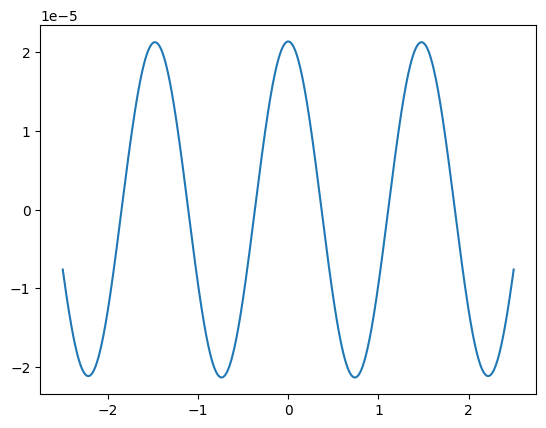

In [144]:
#plt.plot(omega,ourmel2.real)
plt.plot(omega, ourmel.real)
#plt.xlim(0,10)
plt.show()

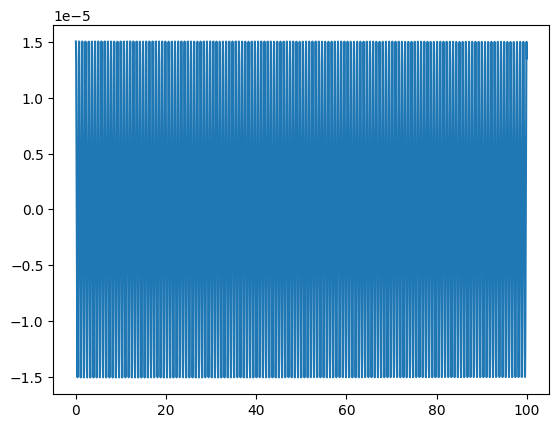

In [65]:
plt.plot(omega,ourmel)
plt.show()

In [ ]:
# some very curious stuff, not sure what going on...
# fisher information is perhaps the best course of action. somehow.
# but these things aren't decaying as expected.

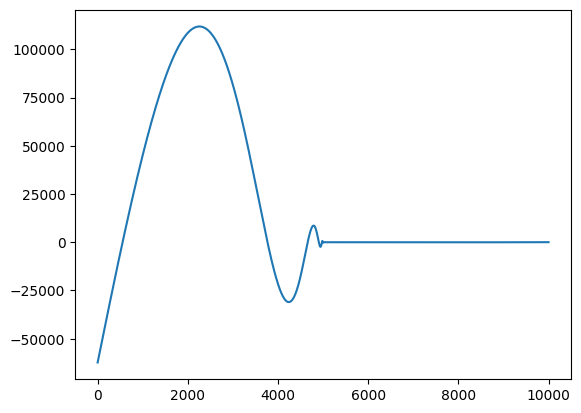

In [119]:
plt.plot(tau2**(1j*omega[100]+1))

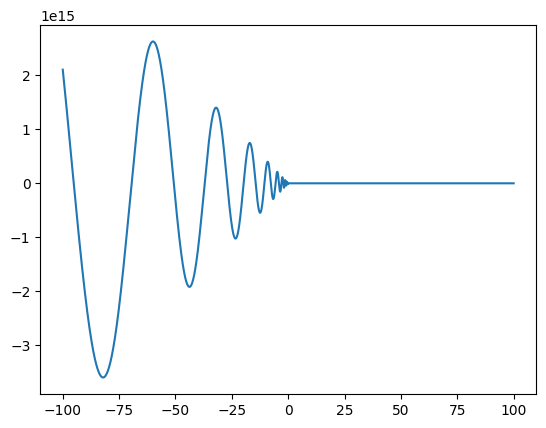

In [127]:
omeg= 10
plt.plot(tau2, tau2**(-1j*omeg + 1))
plt.show()

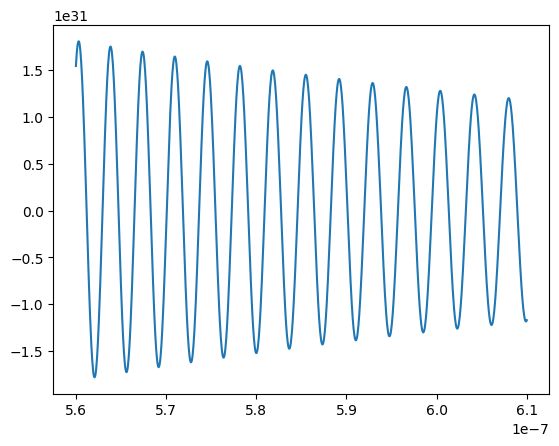

In [139]:
wavels = np.linspace(560e-9, 610e-9, 1024)
omeg = 1000
plt.plot(wavels, wavels**(1j*omeg-5))
plt.show()

In [ ]:
# things aren't making much sense....
# need to check analytic defn of mellin transform